In [1]:
import json
import numpy as np
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스 5조/2.데이터/재활의료기관,발달장애인 거점병원.csv',encoding='cp949')

df.rename(columns = {'Longitude\t' : 'Longitude'}, inplace = True)


df.head()

,병원명,Latitude,Longitude,주소
0,국립재활원,37.638570,127.010550,강북구 삼각산로?58
1,서울재활병원,37.605180,126.907500,은평구 갈현로11길 30
2,명지춘혜재활병원,37.500640,126.897120,영등포구 대림동 대림로 223
3,제니스병원,37.546556,127.086528,광진구 구의동 자양로 215
4,청담병원,37.520680,127.045700,강남구 청담동 15-1


- 서울시 지도 json 받아오기

In [ ]:
geo_str = json.load(open("/content/drive/MyDrive/멀티캠퍼스 5조/2.데이터/json/skorea_municipalities_geo_simple.json", encoding = 'utf-8'))


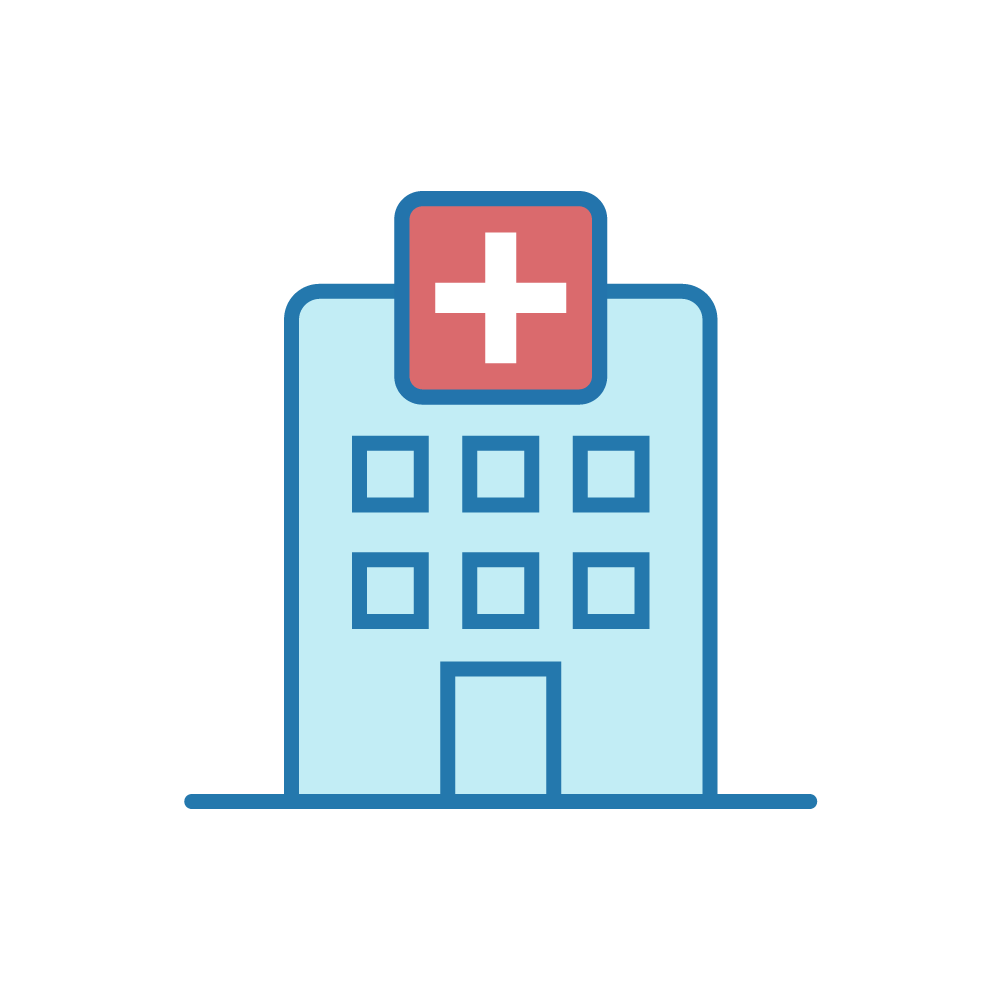
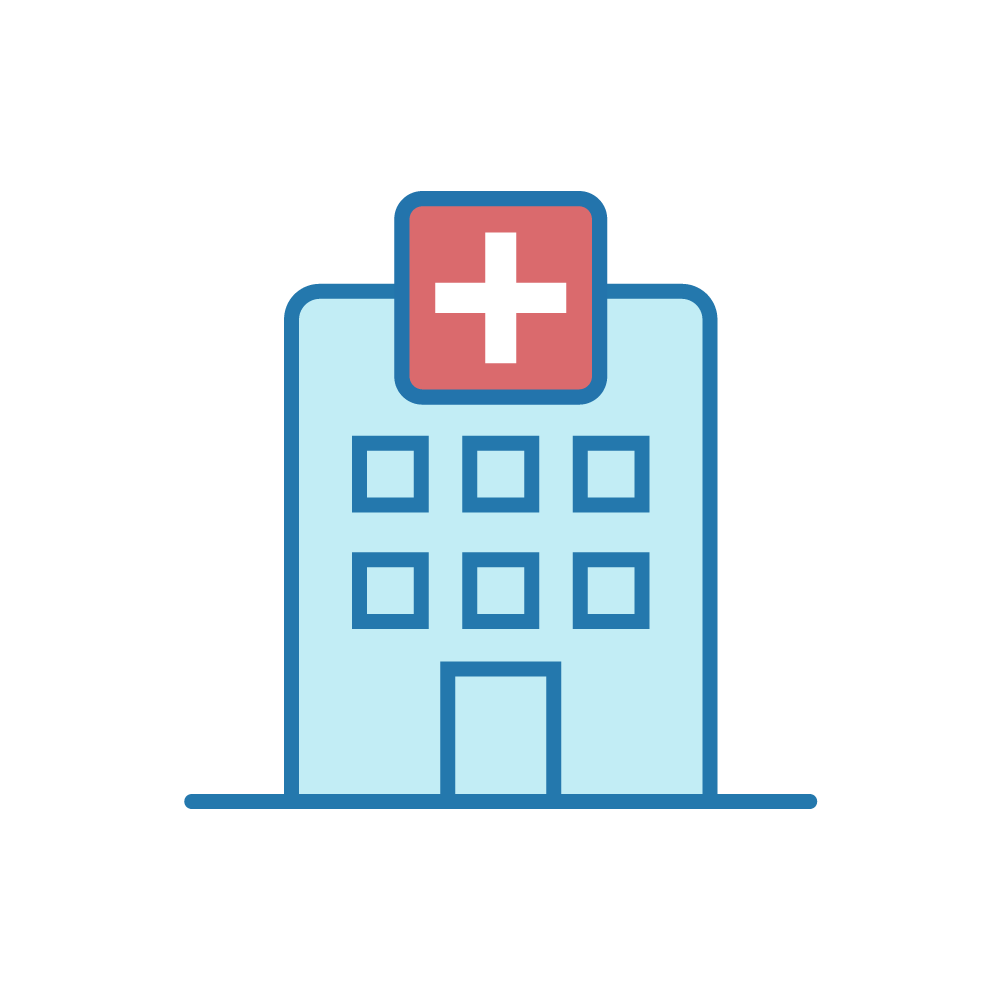
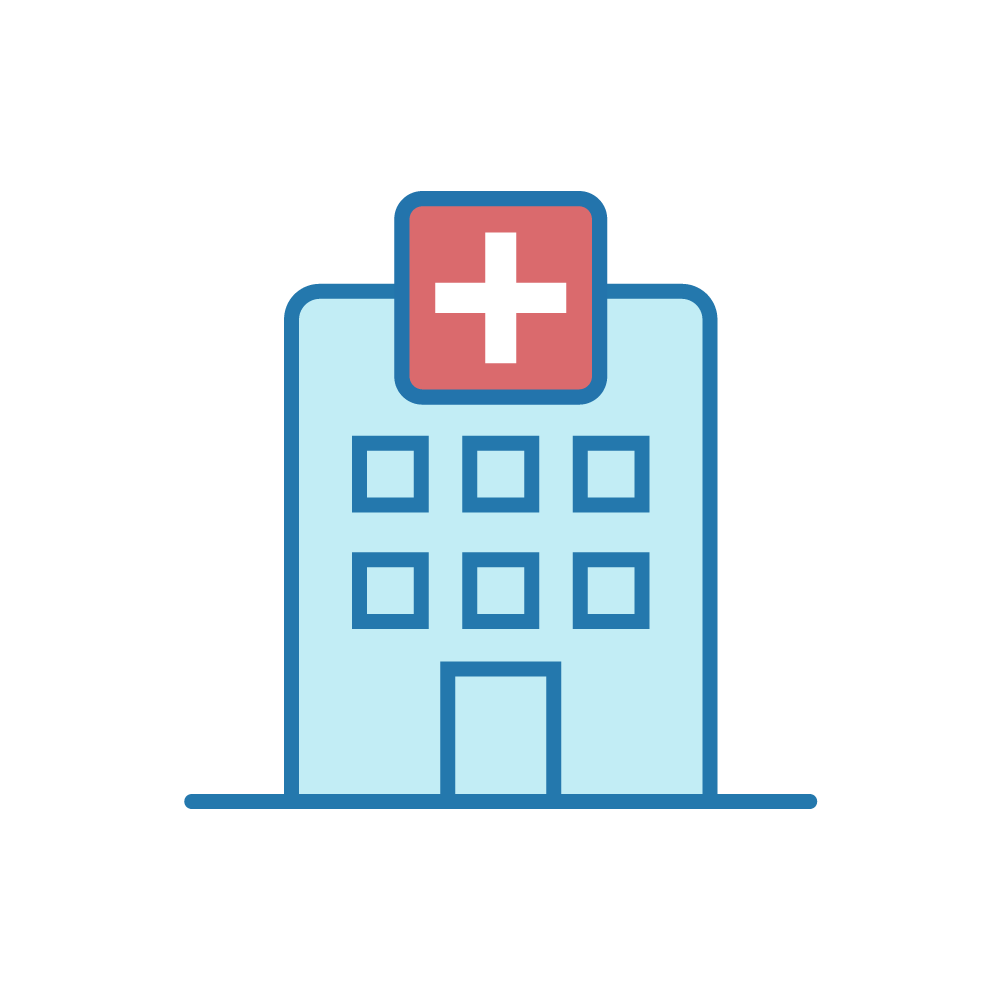
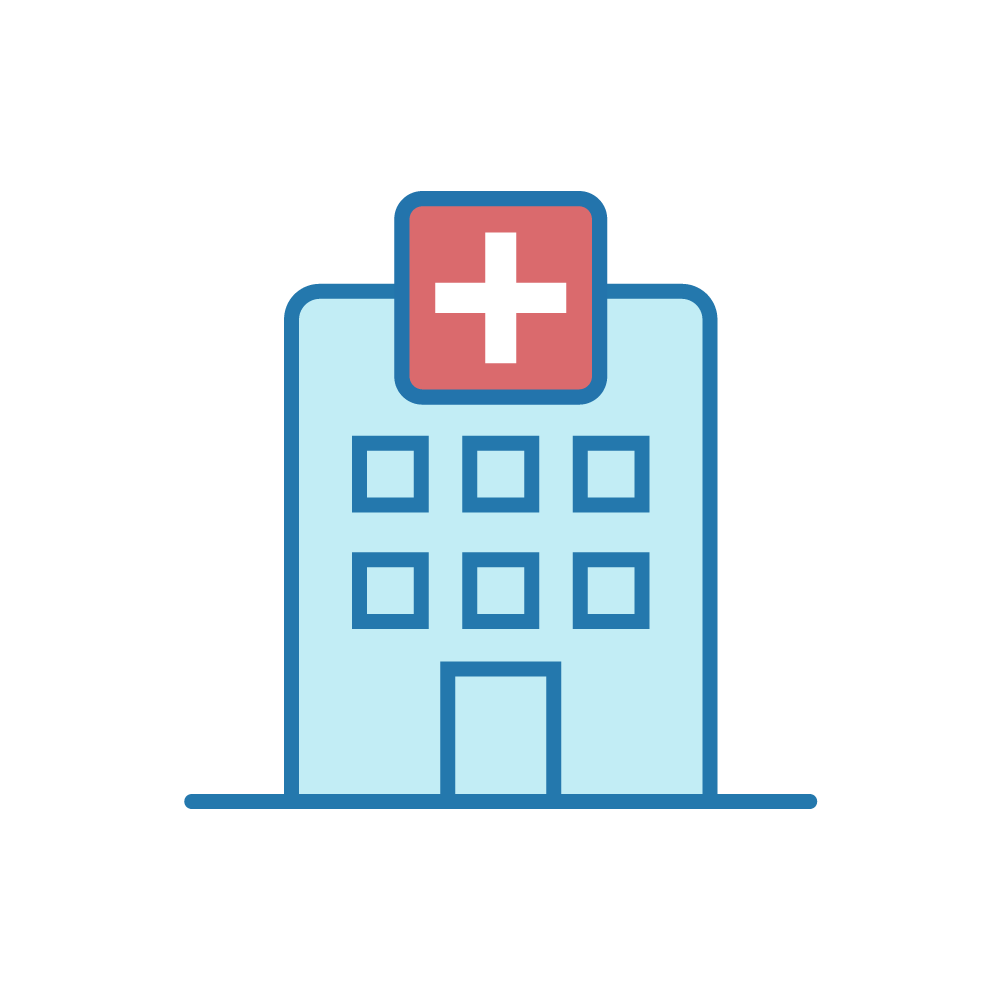
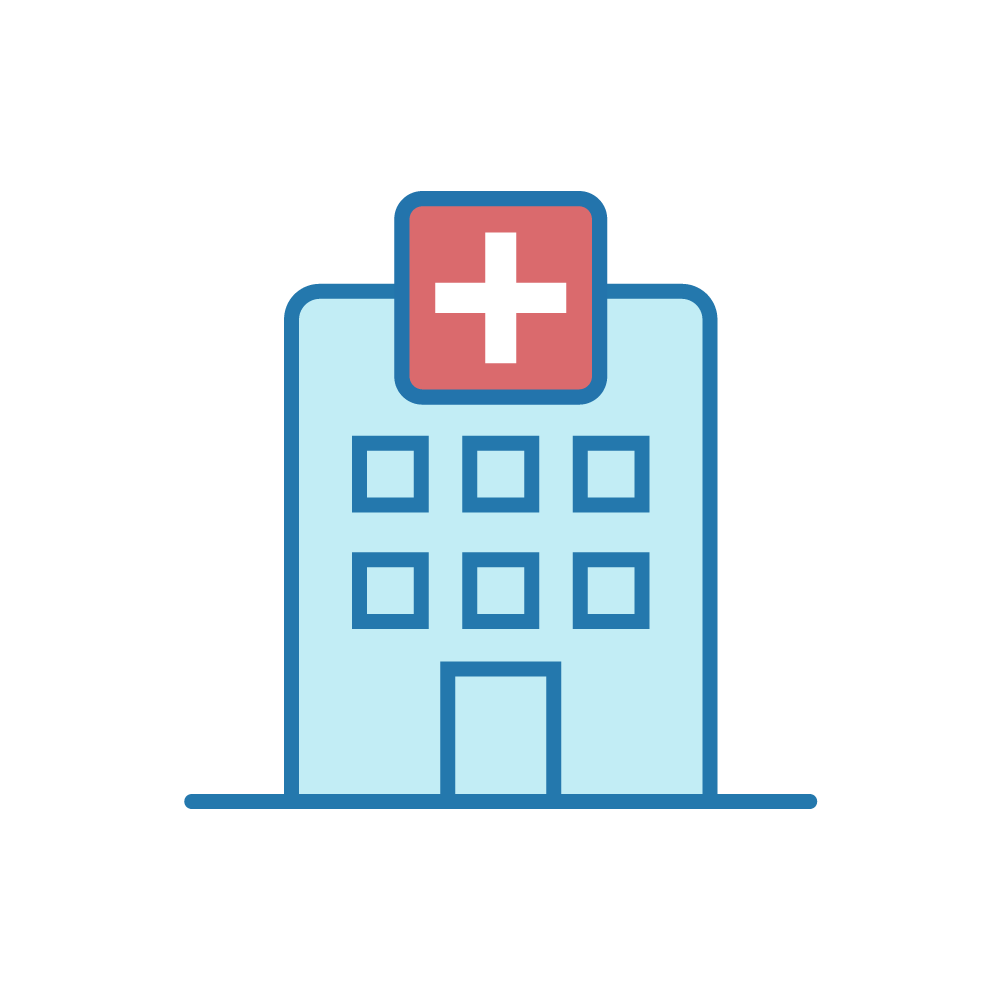
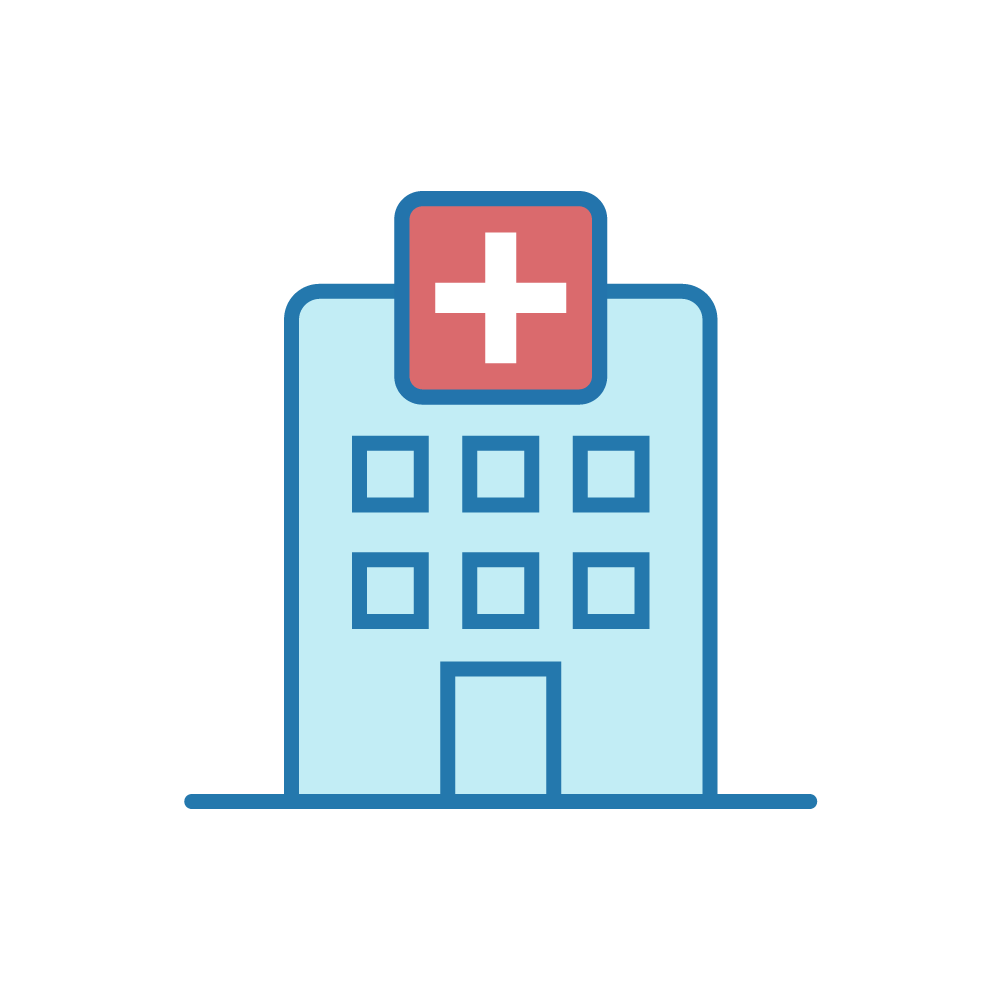
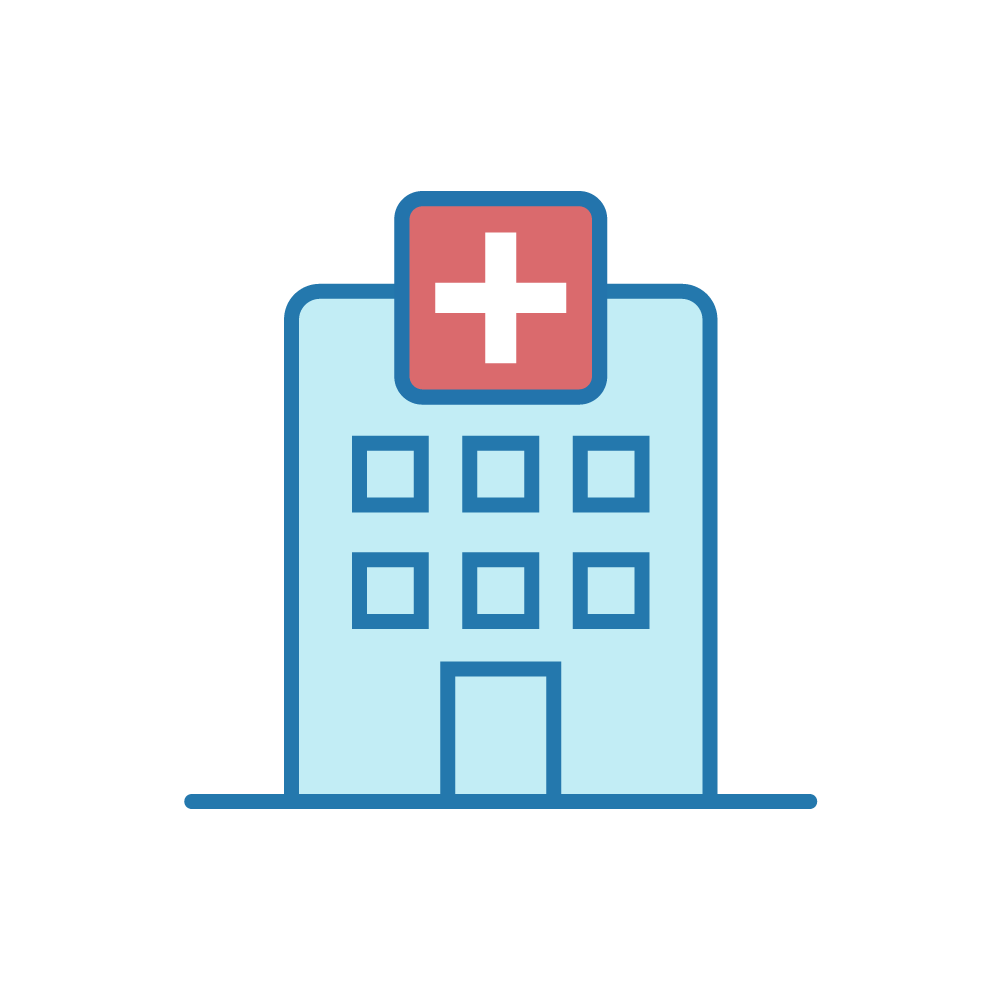

In [ ]:
map = folium.Map(location = [37.5502, 126.982], zoom_start=11)
marker_cluster = MarkerCluster().add_to(map) 

for i in range(len(df)):
    icon1 = CustomIcon(
        '/content/drive/MyDrive/멀티캠퍼스 5조/기타 자료(이미지 파일 등)/hospital.png',
        icon_size=(34,36)
    )
    folium.Marker(
        location = [df.loc[i,'Latitude'], df.loc[i,'Longitude']],
        icon = icon1,
        tooltip = df.loc[i, '병원명']
        ).add_to(map)

    folium.Circle(location = [df.loc[i,'Latitude'], df.loc[i,'Longitude']], 
                radius = 1000, 
                fill_color = 'darkorange', color = 'darkorange').add_to(map)

def style_function(feature):
    default_style = {
        'opacity': 1,
        'fillColor': 'white',
        'color': 'darkred',
        'weight': 2.5
        }
    return default_style

folium.GeoJson(geo_str,style_function = style_function).add_to(map)

map